# IMPORTING LIBRARIES

In [0]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

<!-- # Inserting Extra Features  -->

# DATA PREPERATION

## BRENT OIL FUTURES 

### Brent Oil Futures Historical Data

In [0]:
brent_oil = pd.read_csv('Brent Oil Futures Historical Data.csv') 

In [185]:
brent_oil.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2017",66.87,66.15,66.98,66.15,157.95K,0.22%
1,"Dec 28, 2017",66.72,66.43,66.85,66.23,35.09K,0.42%
2,"Dec 27, 2017",66.44,66.76,66.94,66.03,122.43K,-0.87%
3,"Dec 26, 2017",67.02,65.20,67.10,65.00,74.25K,2.71%
4,"Dec 22, 2017",65.25,64.63,65.28,64.38,110.42K,0.54%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [186]:
brent_oil[brent_oil.isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [187]:
import numpy as np
np.sum(brent_oil.isnull().any(axis=1))

0

In [188]:
brent_oil.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [189]:
brent_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 7 columns):
Date        1548 non-null object
Price       1548 non-null float64
Open        1548 non-null float64
High        1548 non-null float64
Low         1548 non-null float64
Vol.        1548 non-null object
Change %    1548 non-null object
dtypes: float64(4), object(3)
memory usage: 84.7+ KB


In [190]:
brent_oil.describe()

,Price,Open,High,Low
count,1548.000000,1548.000000,1548.000000,1548.000000
mean,78.919231,78.931654,79.784367,78.013714
std,29.378784,29.342472,29.370363,29.297804
min,27.880000,27.990000,28.750000,27.100000
25%,50.800000,50.882500,51.547500,50.060000
50%,66.230000,66.075000,66.905000,65.050000
75%,108.767500,108.682500,109.460000,107.792500
max,126.220000,126.160000,128.400000,125.000000


In [0]:
brent_oil=brent_oil.rename(columns={'Change %':'Change_oil'})
brent_oil=brent_oil[['Date','Change_oil']]

In [192]:

brent_oil.head()

,Date,Change_oil
0,"Dec 29, 2017",0.22%
1,"Dec 28, 2017",0.42%
2,"Dec 27, 2017",-0.87%
3,"Dec 26, 2017",2.71%
4,"Dec 22, 2017",0.54%


## DAX

### DAX Historical Data

In [0]:
DAX= pd.read_csv('DAX Historical Data.csv') 

In [194]:
DAX.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2017","12,917.64","12,980.09","12,980.74","12,911.73",43.47M,-0.48%
1,"Dec 28, 2017","12,979.94","13,065.46","13,069.40","12,965.28",44.49M,-0.69%
2,"Dec 27, 2017","13,070.02","13,070.19","13,128.74","13,020.43",46.06M,-0.02%
3,"Dec 22, 2017","13,072.79","13,076.76","13,108.56","13,059.87",54.51M,-0.28%
4,"Dec 21, 2017","13,109.74","13,065.79","13,137.71","13,013.63",72.54M,0.31%


<br>
<hr size=6 color='black'>
<br>


### Dataset analysis

In [195]:
DAX[DAX.isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [196]:
import numpy as np
np.sum(DAX.isnull().any(axis=1))

0

In [197]:
DAX.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [198]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 7 columns):
Date        1520 non-null object
Price       1520 non-null object
Open        1520 non-null object
High        1520 non-null object
Low         1520 non-null object
Vol.        1520 non-null object
Change %    1520 non-null object
dtypes: object(7)
memory usage: 83.2+ KB


In [199]:
DAX.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1520,1520,1520,1520,1520,1520,1520
unique,1520,1517,1519,1516,1518,1406,471
top,"May 18, 2012","11,815.01","11,881.49","11,881.81","9,805.55",82.31M,0.19%
freq,1,2,2,2,2,4,17


### Getting change feature

In [0]:
DAX=DAX.rename(columns={'Change %':'Change_DAX'})
DAX=DAX[['Date','Change_DAX']]

In [201]:
DAX.head()

,Date,Change_DAX
0,"Dec 29, 2017",-0.48%
1,"Dec 28, 2017",-0.69%
2,"Dec 27, 2017",-0.02%
3,"Dec 22, 2017",-0.28%
4,"Dec 21, 2017",0.31%


### Merging The data for change feature

In [202]:
aa=display('change_feature', 'DAX', "pd.merge(brent_oil, brent_oil, on='Date')")

'change_feature'

'DAX'

"pd.merge(brent_oil, brent_oil, on='Date')"

In [0]:
change_feature =pd.merge(brent_oil, DAX, on='Date')

In [204]:
change_feature.head()

,Date,Change_oil,Change_DAX
0,"Dec 29, 2017",0.22%,-0.48%
1,"Dec 28, 2017",0.42%,-0.69%
2,"Dec 27, 2017",-0.87%,-0.02%
3,"Dec 22, 2017",0.54%,-0.28%
4,"Dec 21, 2017",0.53%,0.31%


## GOLD FUTURES

### Gold Futures Historical Data

In [0]:
gold_features = pd.read_csv('Gold Futures Historical Data.csv') 

In [206]:
gold_features.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 01, 2018","1,308.70","1,305.80","1,309.70","1,304.60",-,-2.87%
1,"Dec 29, 2017","1,347.40","1,347.50","1,347.50","1,347.50",0.02K,4.12%
2,"Dec 28, 2017","1,294.10","1,288.20","1,293.70","1,288.20",0.25K,-2.58%
3,"Dec 27, 2017","1,328.40","1,328.30","1,328.30","1,328.30",0.00K,0.29%
4,"Dec 26, 2017","1,324.60","1,320.50","1,324.10","1,320.50",0.01K,3.65%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [207]:
gold_features[gold_features.isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [208]:
import numpy as np
np.sum(gold_features.isnull().any(axis=1))

0

In [209]:
gold_features.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [210]:
gold_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 7 columns):
Date        1564 non-null object
Price       1564 non-null object
Open        1564 non-null object
High        1564 non-null object
Low         1564 non-null object
Vol.        1564 non-null object
Change %    1564 non-null object
dtypes: object(7)
memory usage: 85.6+ KB


In [211]:
gold_features.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1564,1564,1564,1564,1564,1564,1564
unique,1564,1280,1283,1283,1314,223,447
top,"May 18, 2012","1,233.60","1,252.70","1,235.20","1,218.60",0.01K,0.01%
freq,1,5,5,4,5,127,16


### Getting change feature

In [0]:
gold_features=gold_features.rename(columns={'Change %':'Change_gold'})
gold_features=gold_features[['Date','Change_gold']]

In [213]:
gold_features.head()

,Date,Change_gold
0,"Jan 01, 2018",-2.87%
1,"Dec 29, 2017",4.12%
2,"Dec 28, 2017",-2.58%
3,"Dec 27, 2017",0.29%
4,"Dec 26, 2017",3.65%


### Merging The data for change feature

In [214]:
aa=display('change_feature', 'gold_features', "pd.merge(brent_oil, brent_oil, on='Date')")

'change_feature'

'gold_features'

"pd.merge(brent_oil, brent_oil, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, gold_features, on='Date')

In [216]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold
0,"Dec 29, 2017",0.22%,-0.48%,4.12%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%
4,"Dec 21, 2017",0.53%,0.31%,0.07%


## NIKKEI 225

### Nikkei 225 Historical Data

In [0]:
Nikkei= pd.read_csv('Nikkei 225 Historical Data.csv') 

In [218]:
Nikkei.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2017","22,764.94","22,831.49","22,881.21","22,753.20",478.72M,-0.08%
1,"Dec 28, 2017","22,783.98","22,912.05","22,954.45","22,736.43",519.04M,-0.56%
2,"Dec 27, 2017","22,911.21","22,854.39","22,936.16","22,854.39",487.44M,0.08%
3,"Dec 26, 2017","22,892.69","22,922.95","22,950.15","22,877.63",477.84M,-0.20%
4,"Dec 25, 2017","22,939.18","22,909.41","22,948.83","22,870.19",444.48M,0.16%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [219]:
Nikkei[Nikkei.isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [220]:
import numpy as np
np.sum(Nikkei.isnull().any(axis=1))

0

In [221]:
Nikkei.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [222]:
Nikkei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
Date        1502 non-null object
Price       1502 non-null object
Open        1502 non-null object
High        1502 non-null object
Low         1502 non-null object
Vol.        1502 non-null object
Change %    1502 non-null object
dtypes: object(7)
memory usage: 82.2+ KB


In [223]:
Nikkei.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1502,1502,1502,1502,1502,1502,1502
unique,1502,1502,1500,1502,1500,1118,491
top,"Jul 29, 2015","22,351.12","19,953.06","9,609.84","17,869.74",-,-0.39%
freq,1,1,2,1,2,29,12


### Getting change feature

In [0]:
Nikkei=Nikkei.rename(columns={'Change %':'Change_Nikkei'})
Nikkei=Nikkei[['Date','Change_Nikkei']]

In [225]:
Nikkei.head()

,Date,Change_Nikkei
0,"Dec 29, 2017",-0.08%
1,"Dec 28, 2017",-0.56%
2,"Dec 27, 2017",0.08%
3,"Dec 26, 2017",-0.20%
4,"Dec 25, 2017",0.16%


### Merging The data for change feature

In [226]:
aa=display('change_feature', 'Nikkei', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'Nikkei'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, Nikkei, on='Date')

In [228]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%


## S&P 500

### S&P 500 Historical Data

In [0]:
SP= pd.read_csv('S&P 500 Historical Data.csv') 

In [230]:
SP.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2017","2,673.61","2,689.15","2,692.12","2,673.61",-,-0.52%
1,"Dec 28, 2017","2,687.54","2,686.10","2,687.66","2,682.69",-,0.18%
2,"Dec 27, 2017","2,682.62","2,682.10","2,685.64","2,678.91",-,0.08%
3,"Dec 26, 2017","2,680.50","2,679.09","2,682.74","2,677.96",-,-0.11%
4,"Dec 22, 2017","2,683.34","2,684.22","2,685.35","2,678.13",-,-0.05%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [231]:
SP[SP.isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [232]:
import numpy as np
np.sum(SP.isnull().any(axis=1))

0

In [233]:
SP.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [234]:
SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
Date        1509 non-null object
Price       1509 non-null object
Open        1509 non-null object
High        1509 non-null object
Low         1509 non-null object
Vol.        1509 non-null object
Change %    1509 non-null object
dtypes: object(7)
memory usage: 82.6+ KB


In [235]:
SP.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1509,1509,1509,1509,1509,1509,1509
unique,1509,1500,1497,1494,1501,1,349
top,"Jul 29, 2015","2,102.31","2,173.29","2,094.32","2,041.88",-,-0.01%
freq,1,2,2,2,3,1509,18


### Getting change feature

In [0]:
SP=SP.rename(columns={'Change %':'Change_SP'})
SP=SP[['Date','Change_SP']]

In [237]:
SP.head()

,Date,Change_SP
0,"Dec 29, 2017",-0.52%
1,"Dec 28, 2017",0.18%
2,"Dec 27, 2017",0.08%
3,"Dec 26, 2017",-0.11%
4,"Dec 22, 2017",-0.05%


### Merging The data for change feature

In [238]:
aa=display('change_feature', 'SP', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'SP'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, SP, on='Date')

In [240]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%


## SHANGHAI COMPOSITE

### Shanghai Composite Historical Data

In [0]:
Shanghai= pd.read_csv('Shanghai Composite Historical Data.csv') 

In [242]:
Shanghai.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2017","3,307.17","3,295.25","3,308.22","3,292.77",14.16B,0.33%
1,"Dec 28, 2017","3,296.38","3,272.29","3,304.10","3,263.73",17.54B,0.63%
2,"Dec 27, 2017","3,275.78","3,302.46","3,307.08","3,270.35",16.27B,-0.92%
3,"Dec 26, 2017","3,306.12","3,277.84","3,307.30","3,274.33",14.24B,0.78%
4,"Dec 25, 2017","3,280.46","3,296.21","3,312.30","3,270.44",14.69B,-0.50%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [243]:
Shanghai [Shanghai .isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Vol.,Change %


In [244]:
import numpy as np
np.sum(Shanghai .isnull().any(axis=1))

0

In [245]:
Shanghai .isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [246]:
Shanghai .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
Date        1459 non-null object
Price       1459 non-null object
Open        1459 non-null object
High        1459 non-null object
Low         1459 non-null object
Vol.        1459 non-null object
Change %    1459 non-null object
dtypes: object(7)
memory usage: 79.9+ KB


In [247]:
Shanghai .describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1459,1459,1459,1459,1459,1459,1459
unique,1459,1453,1448,1450,1452,1160,476
top,"May 18, 2012","3,052.78","2,023.15","2,234.72","2,414.40",7.16B,0.07%
freq,1,2,2,2,2,6,15


### Getting change feature

In [0]:
Shanghai=Shanghai.rename(columns={'Change %':'Change_Shanghai'})
Shanghai=Shanghai[['Date','Change_Shanghai']]

In [249]:
Shanghai.head()

,Date,Change_Shanghai
0,"Dec 29, 2017",0.33%
1,"Dec 28, 2017",0.63%
2,"Dec 27, 2017",-0.92%
3,"Dec 26, 2017",0.78%
4,"Dec 25, 2017",-0.50%


### Merging The data for change feature

In [250]:
aa=display('change_feature', 'Shanghai', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'Shanghai'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, Shanghai, on='Date')

In [252]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%


## USD-EUR

### USD_EUR Historical Data

In [0]:
USD_EUR= pd.read_csv('USD_EUR Historical Data.csv') 

In [254]:
USD_EUR.head()

,Date,Price,Open,High,Low,Change %
0,"Jan 01, 2018",0.8327,0.8333,0.8337,0.8325,-0.10%
1,"Dec 29, 2017",0.8335,0.8374,0.8378,0.8314,-0.47%
2,"Dec 28, 2017",0.8374,0.8413,0.8413,0.8363,-0.44%
3,"Dec 27, 2017",0.8411,0.8434,0.8437,0.8397,-0.26%
4,"Dec 26, 2017",0.8433,0.8427,0.8441,0.8417,0.08%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [255]:
USD_EUR [USD_EUR .isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Change %


In [256]:
import numpy as np
np.sum(USD_EUR .isnull().any(axis=1))

0

In [257]:
USD_EUR .isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Change %    False
dtype: bool

In [258]:
USD_EUR .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 6 columns):
Date        1566 non-null object
Price       1566 non-null float64
Open        1566 non-null float64
High        1566 non-null float64
Low         1566 non-null float64
Change %    1566 non-null object
dtypes: float64(4), object(2)
memory usage: 73.5+ KB


In [259]:
USD_EUR .describe()

,Price,Open,High,Low
count,1566.000000,1566.000000,1566.000000,1566.000000
mean,0.829482,0.829388,0.832929,0.826056
std,0.073472,0.073471,0.074230,0.072684
min,0.717700,0.717700,0.718900,0.714500
25%,0.760300,0.760200,0.763525,0.756925
50%,0.827750,0.826300,0.830150,0.824700
75%,0.896375,0.896300,0.900000,0.892100
max,0.962700,0.962700,0.967100,0.960000


### Getting change feature

In [0]:
USD_EUR=USD_EUR.rename(columns={'Change %':'Change_USD_EUR'})
USD_EUR=USD_EUR[['Date','Change_USD_EUR']]

In [261]:
USD_EUR.head()

,Date,Change_USD_EUR
0,"Jan 01, 2018",-0.10%
1,"Dec 29, 2017",-0.47%
2,"Dec 28, 2017",-0.44%
3,"Dec 27, 2017",-0.26%
4,"Dec 26, 2017",0.08%


### Merging The data for change feature

In [262]:
aa=display('change_feature', 'USD_EUR', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'USD_EUR'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, USD_EUR, on='Date')

In [264]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%


## USD-GBP

### USD_GBP Historical Data

In [0]:
USD_GBP= pd.read_csv('USD_GBP Historical Data.csv') 

In [266]:
USD_GBP.head()

,Date,Price,Open,High,Low,Change %
0,"Jan 01, 2018",0.7406,0.7399,0.7411,0.7396,0.09%
1,"Dec 29, 2017",0.7399,0.7438,0.7449,0.7383,-0.54%
2,"Dec 28, 2017",0.7439,0.7463,0.7466,0.7430,-0.33%
3,"Dec 27, 2017",0.7464,0.7478,0.7481,0.7446,-0.17%
4,"Dec 26, 2017",0.7477,0.7480,0.7492,0.7468,-0.04%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [267]:
USD_GBP [USD_GBP .isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Change %


In [268]:
import numpy as np
np.sum(USD_GBP
       .isnull().any(axis=1))

0

In [269]:
USD_GBP .isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Change %    False
dtype: bool

In [270]:
USD_GBP .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 6 columns):
Date        1566 non-null object
Price       1566 non-null float64
Open        1566 non-null float64
High        1566 non-null float64
Low         1566 non-null float64
Change %    1566 non-null object
dtypes: float64(4), object(2)
memory usage: 73.5+ KB


In [271]:
USD_GBP .describe()

,Price,Open,High,Low
count,1566.000000,1566.000000,1566.000000,1566.000000
mean,0.674902,0.674777,0.677634,0.672232
std,0.066260,0.066275,0.067085,0.065594
min,0.582600,0.582500,0.583500,0.581600
25%,0.626025,0.625950,0.628400,0.624025
50%,0.650000,0.649900,0.652350,0.647350
75%,0.740125,0.739800,0.743475,0.735775
max,0.830000,0.829600,0.846100,0.827700


### Getting change feature

In [0]:
USD_GBP=USD_GBP.rename(columns={'Change %':'Change_USD_GBP'})
USD_GBP=USD_GBP[['Date','Change_USD_GBP']]

In [273]:
USD_GBP.head()

,Date,Change_USD_GBP
0,"Jan 01, 2018",0.09%
1,"Dec 29, 2017",-0.54%
2,"Dec 28, 2017",-0.33%
3,"Dec 27, 2017",-0.17%
4,"Dec 26, 2017",-0.04%


### Merging The data for change feature

In [274]:
aa=display('change_feature', 'USD_GBP', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'USD_GBP'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, USD_GBP, on='Date')

In [276]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%,-0.54%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%,-0.33%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%,-0.17%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%,0.16%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%,-0.08%


## USD-JPY

### USD_JPY Historical Data

In [0]:
USD_JPY= pd.read_csv('USD_JPY Historical Data.csv') 

In [278]:
USD_JPY.head()

,Date,Price,Open,High,Low,Change %
0,"Jan 01, 2018",112.66,112.67,112.69,112.64,-0.03%
1,"Dec 29, 2017",112.69,112.88,112.98,112.47,-0.18%
2,"Dec 28, 2017",112.89,113.36,113.36,112.67,-0.41%
3,"Dec 27, 2017",113.36,113.25,113.39,113.14,0.11%
4,"Dec 26, 2017",113.23,113.28,113.36,113.12,-0.04%


<br>
<hr size=6 color='black'>
<br>

### Dataset analysis

In [279]:
USD_JPY [USD_JPY .isnull().any(axis=1)].head()

,Date,Price,Open,High,Low,Change %


In [280]:
import numpy as np
np.sum(USD_JPY .isnull().any(axis=1))

0

In [281]:
USD_JPY.isnull().any(axis=0)

Date        False
Price       False
Open        False
High        False
Low         False
Change %    False
dtype: bool

In [282]:
USD_JPY .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 6 columns):
Date        1566 non-null object
Price       1566 non-null float64
Open        1566 non-null float64
High        1566 non-null float64
Low         1566 non-null float64
Change %    1566 non-null object
dtypes: float64(4), object(2)
memory usage: 73.5+ KB


In [283]:
USD_JPY .describe()

,Price,Open,High,Low
count,1566.000000,1566.000000,1566.000000,1566.000000
mean,104.228889,104.191194,104.648091,103.726015
std,13.553118,13.564863,13.623529,13.492504
min,76.190000,76.180000,76.240000,76.020000
25%,98.237500,98.155000,98.705000,97.742500
50%,104.850000,104.835000,105.350000,104.300000
75%,113.897500,113.912500,114.355000,113.325000
max,125.620000,125.580000,125.860000,124.520000


### Getting change feature

In [0]:
USD_JPY=USD_JPY.rename(columns={'Change %':'Change_USD_JPY'})
USD_JPY=USD_JPY[['Date','Change_USD_JPY']]

In [285]:
USD_JPY.head()

,Date,Change_USD_JPY
0,"Jan 01, 2018",-0.03%
1,"Dec 29, 2017",-0.18%
2,"Dec 28, 2017",-0.41%
3,"Dec 27, 2017",0.11%
4,"Dec 26, 2017",-0.04%


### Merging The data for change feature

In [286]:
aa=display('change_feature', 'USD_JPY', "pd.merge(change_feature, change_feature, on='Date')")

'change_feature'

'USD_JPY'

"pd.merge(change_feature, change_feature, on='Date')"

In [0]:
change_feature =pd.merge(change_feature, USD_JPY, on='Date')

In [288]:
change_feature

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%,-0.54%,-0.18%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%,-0.33%,-0.41%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%,-0.17%,0.11%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%,0.16%,-0.05%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%,-0.08%,-0.05%
5,"Dec 20, 2017",1.19%,-1.11%,3.63%,0.10%,-0.08%,-0.27%,-0.26%,0.08%,0.44%
6,"Dec 19, 2017",0.62%,-0.72%,-3.18%,-0.15%,-0.32%,0.88%,-0.49%,-0.01%,0.30%
7,"Dec 18, 2017",0.28%,1.59%,0.63%,1.55%,0.54%,0.05%,-0.24%,-0.47%,-0.03%
8,"Dec 15, 2017",-0.13%,0.27%,0.02%,-0.62%,0.90%,-0.80%,0.21%,0.82%,0.17%
9,"Dec 14, 2017",1.39%,-0.44%,3.88%,-0.28%,-0.41%,-0.32%,0.40%,-0.07%,-0.14%


In [0]:
change_feature = change_feature.dropna(axis = 0, how ='any') 

In [290]:
change_feature

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%,-0.54%,-0.18%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%,-0.33%,-0.41%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%,-0.17%,0.11%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%,0.16%,-0.05%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%,-0.08%,-0.05%
5,"Dec 20, 2017",1.19%,-1.11%,3.63%,0.10%,-0.08%,-0.27%,-0.26%,0.08%,0.44%
6,"Dec 19, 2017",0.62%,-0.72%,-3.18%,-0.15%,-0.32%,0.88%,-0.49%,-0.01%,0.30%
7,"Dec 18, 2017",0.28%,1.59%,0.63%,1.55%,0.54%,0.05%,-0.24%,-0.47%,-0.03%
8,"Dec 15, 2017",-0.13%,0.27%,0.02%,-0.62%,0.90%,-0.80%,0.21%,0.82%,0.17%
9,"Dec 14, 2017",1.39%,-0.44%,3.88%,-0.28%,-0.41%,-0.32%,0.40%,-0.07%,-0.14%


In [0]:
change_feature.to_csv('change_feature.csv')

In [292]:
change_feature.head()

,Date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,"Dec 29, 2017",0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%,-0.54%,-0.18%
1,"Dec 28, 2017",0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%,-0.33%,-0.41%
2,"Dec 27, 2017",-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%,-0.17%,0.11%
3,"Dec 22, 2017",0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%,0.16%,-0.05%
4,"Dec 21, 2017",0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%,-0.08%,-0.05%


In [293]:
import pandas as pd
change_feature  = pd.read_csv('change_feature.csv', index_col='Date', parse_dates=['Date'])
change_feature .head()

,Unnamed: 0,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
Date,,,,,,,,,,
2017-12-29,0,0.22%,-0.48%,4.12%,-0.08%,-0.52%,0.33%,-0.47%,-0.54%,-0.18%
2017-12-28,1,0.42%,-0.69%,-2.58%,-0.56%,0.18%,0.63%,-0.44%,-0.33%,-0.41%
2017-12-27,2,-0.87%,-0.02%,0.29%,0.08%,0.08%,-0.92%,-0.26%,-0.17%,0.11%
2017-12-22,3,0.54%,-0.28%,0.65%,0.16%,-0.05%,-0.09%,0.13%,0.16%,-0.05%
2017-12-21,4,0.53%,0.31%,0.07%,-0.11%,0.20%,0.38%,-0.02%,-0.08%,-0.05%


In [0]:
change_feature=change_feature.drop(columns=['Unnamed: 0'])
change_feature=change_feature.rename(columns={'Date':'date'})

In [0]:
aa=change_feature.iloc[::-1]
aa.to_csv('change_feature.csv')

In [296]:
change_feature  = pd.read_csv('change_feature.csv')
change_feature=change_feature.rename(columns={'Date':'date'})
change_feature.head()

,date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,2012-01-04,1.40%,-0.89%,0.76%,1.24%,0.02%,-1.37%,0.82%,0.17%,-0.02%
1,2012-01-05,-0.84%,-0.25%,0.47%,-0.83%,0.29%,-0.97%,1.26%,0.84%,0.58%
2,2012-01-06,0.28%,-0.62%,-0.20%,-1.16%,-0.25%,0.70%,0.50%,0.39%,-0.27%
3,2012-01-10,0.74%,2.42%,1.46%,0.38%,0.89%,2.69%,-0.08%,-0.17%,-0.02%
4,2012-01-11,-0.92%,-0.17%,0.50%,0.30%,0.03%,-0.42%,0.55%,1.02%,0.02%


# DATA CLEANING

## Cleaning % from all coloumns of change_feature

In [0]:
for letter in '%':
    change_feature['Change_oil']= change_feature['Change_oil'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_DAX']= change_feature['Change_DAX'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_gold']= change_feature['Change_gold'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_Nikkei']= change_feature['Change_Nikkei'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_SP']= change_feature['Change_SP'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_Shanghai']= change_feature['Change_Shanghai'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_USD_EUR']= change_feature['Change_USD_EUR'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_USD_GBP']= change_feature['Change_USD_GBP'].str.replace(letter,'')

In [0]:
for letter in '%':
    change_feature['Change_USD_JPY']= change_feature['Change_USD_JPY'].str.replace(letter,'')

In [306]:
change_feature

,date,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,2012-01-04,1.40,-0.89,0.76,1.24,0.02,-1.37,0.82,0.17,-0.02
1,2012-01-05,-0.84,-0.25,0.47,-0.83,0.29,-0.97,1.26,0.84,0.58
2,2012-01-06,0.28,-0.62,-0.20,-1.16,-0.25,0.70,0.50,0.39,-0.27
3,2012-01-10,0.74,2.42,1.46,0.38,0.89,2.69,-0.08,-0.17,-0.02
4,2012-01-11,-0.92,-0.17,0.50,0.30,0.03,-0.42,0.55,1.02,0.02
5,2012-01-12,-0.87,0.44,0.49,-0.74,0.23,-0.05,-0.94,-0.11,-0.10
6,2012-01-13,-0.74,-0.58,-1.03,1.36,-0.49,-1.34,1.21,0.11,0.22
7,2012-01-17,0.30,1.82,1.52,1.05,0.36,4.18,-0.57,-0.06,-0.01
8,2012-01-18,-0.78,0.34,0.26,0.99,1.11,-1.39,-0.96,-0.64,-0.04
9,2012-01-19,0.80,0.97,-0.33,1.04,0.49,1.31,-0.80,-0.34,0.37


# API FUNCTION DEFINING

In [0]:
def get_data(symbol):

    # API KEY: 51N1JMO66W56AYA3
    ti = TechIndicators(key='VBKOCXACKRG8JMI3', output_format='pandas')
    sma, _ = ti.get_sma(symbol=symbol, interval='daily')
    wma, _ = ti.get_wma(symbol=symbol, interval='daily')
    ema, _ = ti.get_ema(symbol=symbol, interval='daily')
    macd, _ = ti.get_macd(symbol=symbol, interval='daily')
    stoch, _ = ti.get_stoch(symbol=symbol, interval='daily')
    #  Alpha Vantage Times out for more than 5 request 
    time.sleep(65)
    rsi, _ = ti.get_rsi(symbol=symbol, interval='daily')
    adx, _ = ti.get_adx(symbol=symbol, interval='daily')
    cci, _ = ti.get_cci(symbol=symbol, interval='daily')
    aroon, _ = ti.get_aroon(symbol=symbol, interval='daily')
    bbands, _ = ti.get_bbands(symbol=symbol, interval='daily')
    time.sleep(65)
    ad, _ = ti.get_ad(symbol=symbol, interval='daily')
    obv, _ = ti.get_obv(symbol=symbol, interval='daily')
    mom, _ = ti.get_mom(symbol=symbol, interval='daily')
    willr, _ = ti.get_willr(symbol=symbol, interval='daily')
    time.sleep(65)
    tech_ind = pd.concat([sma, ema, macd,  rsi, adx, cci, aroon, bbands, ad, obv, wma, mom, willr, stoch], axis=1)

    ts = TimeSeries(key='51N1JMO66W56AYA3', output_format='pandas')
    close2 = ts.get_daily(symbol=symbol, outputsize='full')
    close = ts.get_daily(symbol=symbol, outputsize='full')[0]['4. close']
    direction = (close > close.shift()).astype(int)
    target = direction.shift(-1).fillna(0).astype(int)
    target.name = 'target'

    data = pd.concat([tech_ind, close, target], axis=1)

    return data



In [0]:

def get_indicators(data, n):

    hh = data['2. high'].rolling(n).max()
    ll = data['3. low'].rolling(n).min()
    up, dw = data['4. close'].diff(), -data['4. close'].diff()
    up[up<0], dw[dw<0] = 0, 0
    macd = data['4. close'].ewm(12).mean() - data['4. close'].ewm(26).mean()
    macd_signal = macd.ewm(9).mean()
    tp = (data['2. high'] + data['3. low'] + data['4. close']) / 3
    tp_ma = tp.rolling(n).mean()
    indicators = pd.DataFrame(data=0, index=data.index,
                              columns=['sma', 'ema', 'momentum',
                                       'sto_k', 'sto_d', 'rsi',
                                       'macd', 'lw_r', 'a/d', 'cci'])
    indicators['sma'] = data['4. close'].rolling(10).mean()
    indicators['ema'] = data['4. close'].ewm(10).mean()
    indicators['momentum'] = data['4. close'] - data['4. close'].shift(n)
    indicators['sto_k'] = (data['4. close'] - ll) / (hh - ll) * 100
    indicators['sto_d'] = indicators['sto_k'].rolling(n).mean()
    indicators['rsi'] = 100 - 100 / (1 + up.rolling(14).mean() / dw.rolling(14).mean())
    indicators['macd'] = macd - macd_signal
    indicators['lw_r'] = (hh - data['4. close']) / (hh - ll) * 100
    indicators['a/d'] = (data['2. high'] - data['4. close'].shift()) / (data['2. high'] - data['3. low'])
    indicators['cci'] = (tp - tp_ma) / (0.015 * tp.rolling(n).apply(lambda x: np.std(x)))

    return indicators




In [0]:
def rebalance(unbalanced_data):

    # Separate majority and minority classes
    data_minority = unbalanced_data[unbalanced_data.target==0]
    data_majority = unbalanced_data[unbalanced_data.target==1]

    # Upsample minority class
    n_samples = len(data_majority)
    data_minority_upsampled = resample(data_minority, replace=True, n_samples=n_samples, random_state=5)

    # Combine majority class with upsampled minority class
    data_upsampled = pd.concat([data_majority, data_minority_upsampled])

    data_upsampled.sort_index(inplace=True)

    # Display new class counts
    data_upsampled.target.value_counts()

    return data_upsampled




In [0]:
def normalize(x):

    scaler = StandardScaler()
    x_norm = scaler.fit_transform(x.values)
    x_norm = pd.DataFrame(x_norm, index=x.index, columns=x.columns)

    return x_norm


def scores(models, X, y):

    for model in models:
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        auc = roc_auc_score(y, y_pred)
        print("Accuracy Score: {0:0.2f} %".format(acc * 100))
        print("F1 Score: {0:0.4f}".format(f1))
        print("Area Under ROC Curve Score: {0:0.4f}".format(auc))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



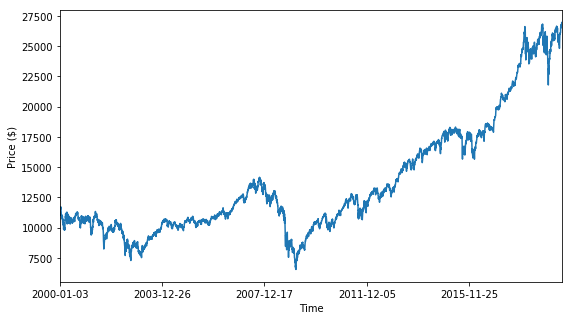

In [311]:
symbolin = 'DJI'  # SPX, DJI, NDX
data = get_data(symbolin)
data.tail(10)
data.describe()
ax = data['4. close'].plot(figsize=(9, 5))
ax.set_ylabel("Price ($)")
ax.set_xlabel("Time")
plt.show()
data_train = data['2012-01-01':'2018-01-01']
data_train = rebalance(data_train)
y = data_train.target
X = data_train.drop('target', axis=1)
X = normalize(X)
data_val = data['2018-01-01':]
y_val = data_val.target
X_val = data_val.drop('target', axis=1)
X_val = normalize(X_val)



# API DATA EXTRACTION AND PREPARATION

### API Data

In [312]:
X

,SMA,EMA,MACD_Signal,MACD_Hist,MACD,RSI,ADX,CCI,Aroon Up,Aroon Down,Real Middle Band,Real Upper Band,Real Lower Band,Chaikin A/D,OBV,WMA,MOM,WILLR,SlowD,SlowK,4. close
date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,-1.694287,-1.694363,0.344340,0.677325,0.530590,0.320665,-1.216580,1.045348,1.043157,0.397045,-1.694287,-1.691755,-1.688849,-1.665851,-1.173527,-1.681318,0.435967,0.771512,0.206056,0.215348,-1.588794
2012-01-04,-1.688502,-1.683398,0.410183,0.763754,0.618568,0.358737,-1.167444,0.982240,0.901421,0.257338,-1.688502,-1.676073,-1.693126,-1.646396,-1.130845,-1.670335,0.317367,0.866379,0.105081,0.224287,-1.581325
2012-01-05,-1.683710,-1.673571,0.474643,0.747369,0.673103,0.351257,-1.145007,0.774677,0.759685,0.117630,-1.683710,-1.663126,-1.696624,-1.625637,-1.177441,-1.659993,0.203627,0.854117,0.424968,0.726144,-1.582291
2012-01-05,-1.683710,-1.673571,0.474643,0.747369,0.673103,0.351257,-1.145007,0.774677,0.759685,0.117630,-1.683710,-1.663126,-1.696624,-1.625637,-1.177441,-1.659993,0.203627,0.854117,0.424968,0.726144,-1.582291
2012-01-06,-1.680759,-1.666598,0.524499,0.574546,0.665181,0.194117,-1.123707,0.637778,0.617950,-0.022077,-1.680759,-1.655836,-1.698086,-1.633503,-1.216003,-1.652013,-0.007277,0.602605,0.513507,0.461067,-1.602092
2012-01-09,-1.673632,-1.659162,0.564967,0.463452,0.667883,0.262352,-1.103466,0.573030,0.476214,-0.161785,-1.673632,-1.645261,-1.694487,-1.621182,-1.180065,-1.643193,0.471173,0.750368,0.527146,0.262135,-1.590459
2012-01-10,-1.668611,-1.650035,0.605087,0.459332,0.703726,0.407915,-1.045314,0.730809,1.043157,-0.301492,-1.668611,-1.632649,-1.697187,-1.617878,-1.138530,-1.632660,0.229757,0.917586,0.345692,0.222578,-1.565688
2012-01-10,-1.668611,-1.650035,0.605087,0.459332,0.703726,0.407915,-1.045314,0.730809,1.043157,-0.301492,-1.668611,-1.632649,-1.697187,-1.617878,-1.138530,-1.632660,0.229757,0.917586,0.345692,0.222578,-1.565688
2012-01-11,-1.660887,-1.642225,0.638436,0.379208,0.709527,0.367098,-0.990056,0.572196,0.901421,-0.441200,-1.660887,-1.621064,-1.693414,-1.604218,-1.176839,-1.623049,0.539538,0.861522,0.336752,0.436246,-1.570310


In [0]:
X.to_csv('X.csv')

### Adding Change features in API data

In [0]:
X=pd.read_csv('X.csv')

In [0]:
X =pd.merge(X, change_feature, on='date')

In [316]:
X

,date,SMA,EMA,MACD_Signal,MACD_Hist,MACD,RSI,ADX,CCI,Aroon Up,Aroon Down,Real Middle Band,Real Upper Band,Real Lower Band,Chaikin A/D,OBV,WMA,MOM,WILLR,SlowD,SlowK,4. close,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY
0,2012-01-04,-1.688502,-1.683398,0.410183,0.763754,0.618568,0.358737,-1.167444,0.982240,0.901421,0.257338,-1.688502,-1.676073,-1.693126,-1.646396,-1.130845,-1.670335,0.317367,0.866379,0.105081,0.224287,-1.581325,1.40,-0.89,0.76,1.24,0.02,-1.37,0.82,0.17,-0.02
1,2012-01-05,-1.683710,-1.673571,0.474643,0.747369,0.673103,0.351257,-1.145007,0.774677,0.759685,0.117630,-1.683710,-1.663126,-1.696624,-1.625637,-1.177441,-1.659993,0.203627,0.854117,0.424968,0.726144,-1.582291,-0.84,-0.25,0.47,-0.83,0.29,-0.97,1.26,0.84,0.58
2,2012-01-05,-1.683710,-1.673571,0.474643,0.747369,0.673103,0.351257,-1.145007,0.774677,0.759685,0.117630,-1.683710,-1.663126,-1.696624,-1.625637,-1.177441,-1.659993,0.203627,0.854117,0.424968,0.726144,-1.582291,-0.84,-0.25,0.47,-0.83,0.29,-0.97,1.26,0.84,0.58
3,2012-01-06,-1.680759,-1.666598,0.524499,0.574546,0.665181,0.194117,-1.123707,0.637778,0.617950,-0.022077,-1.680759,-1.655836,-1.698086,-1.633503,-1.216003,-1.652013,-0.007277,0.602605,0.513507,0.461067,-1.602092,0.28,-0.62,-0.20,-1.16,-0.25,0.70,0.50,0.39,-0.27
4,2012-01-10,-1.668611,-1.650035,0.605087,0.459332,0.703726,0.407915,-1.045314,0.730809,1.043157,-0.301492,-1.668611,-1.632649,-1.697187,-1.617878,-1.138530,-1.632660,0.229757,0.917586,0.345692,0.222578,-1.565688,0.74,2.42,1.46,0.38,0.89,2.69,-0.08,-0.17,-0.02
5,2012-01-10,-1.668611,-1.650035,0.605087,0.459332,0.703726,0.407915,-1.045314,0.730809,1.043157,-0.301492,-1.668611,-1.632649,-1.697187,-1.617878,-1.138530,-1.632660,0.229757,0.917586,0.345692,0.222578,-1.565688,0.74,2.42,1.46,0.38,0.89,2.69,-0.08,-0.17,-0.02
6,2012-01-11,-1.660887,-1.642225,0.638436,0.379208,0.709527,0.367098,-0.990056,0.572196,0.901421,-0.441200,-1.660887,-1.621064,-1.693414,-1.604218,-1.176839,-1.623049,0.539538,0.861522,0.336752,0.436246,-1.570310,-0.92,-0.17,0.50,0.30,0.03,-0.42,0.55,1.02,0.02
7,2012-01-13,-1.640773,-1.629037,0.679431,0.140065,0.672658,0.250943,-0.912851,0.341948,0.617950,-0.720615,-1.640773,-1.611019,-1.663187,-1.575863,-1.186614,-1.606373,0.892046,0.743570,0.459711,0.266242,-1.580033,-0.74,-0.58,-1.03,1.36,-0.49,-1.34,1.21,0.11,0.22
8,2012-01-17,-1.629707,-1.622105,0.688643,0.093558,0.666635,0.393551,-0.856753,0.640119,1.043157,-0.860322,-1.629707,-1.609375,-1.642621,-1.581621,-1.142891,-1.598285,0.922397,0.775828,0.367663,0.180796,-1.558730,0.30,1.82,1.52,1.05,0.36,4.18,-0.57,-0.06,-0.01
9,2012-01-18,-1.616849,-1.612503,0.706217,0.192514,0.713857,0.615657,-0.800215,0.774443,1.043157,-1.000030,-1.616849,-1.606321,-1.619884,-1.555496,-1.097551,-1.587932,1.127677,1.129268,0.335495,0.470442,-1.524340,-0.78,0.34,0.26,0.99,1.11,-1.39,-0.96,-0.64,-0.04


In [317]:
y.head()
y.to_csv('y.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [0]:
y=pd.read_csv('y.csv')


In [319]:
y=pd.read_csv('y.csv')
y.columns = ['date', 'y']
y.head()

,date,y
0,2012-01-04,0
1,2012-01-05,0
2,2012-01-05,0
3,2012-01-06,1
4,2012-01-09,1


In [0]:
X =pd.merge(X, y, on='date')

In [321]:
X

,date,SMA,EMA,MACD_Signal,MACD_Hist,MACD,RSI,ADX,CCI,Aroon Up,Aroon Down,Real Middle Band,Real Upper Band,Real Lower Band,Chaikin A/D,OBV,WMA,MOM,WILLR,SlowD,SlowK,4. close,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY,y
0,2012-01-04,-1.688502,-1.683398,0.410183,0.763754,0.618568,0.358737,-1.167444,0.982240,0.901421,0.257338,-1.688502,-1.676073,-1.693126,-1.646396,-1.130845,-1.670335,0.317367,0.866379,0.105081,0.224287,-1.581325,1.40,-0.89,0.76,1.24,0.02,-1.37,0.82,0.17,-0.02,0
1,2012-01-05,-1.683710,-1.673571,0.474643,0.747369,0.673103,0.351257,-1.145007,0.774677,0.759685,0.117630,-1.683710,-1.663126,-1.696624,-1.625637,-1.177441,-1.659993,0.203627,0.854117,0.424968,0.726144,-1.582291,-0.84,-0.25,0.47,-0.83,0.29,-0.97,1.26,0.84,0.58,0
2,2012-01-05,-1.683710,-1.673571,0.474643,0.747369,0.673103,0.351257,-1.145007,0.774677,0.759685,0.117630,-1.683710,-1.663126,-1.696624,-1.625637,-1.177441,-1.659993,0.203627,0.854117,0.424968,0.726144,-1.582291,-0.84,-0.25,0.47,-0.83,0.29,-0.97,1.26,0.84,0.58,0
3,2012-01-05,-1.683710,-1.673571,0.474643,0.747369,0.673103,0.351257,-1.145007,0.774677,0.759685,0.117630,-1.683710,-1.663126,-1.696624,-1.625637,-1.177441,-1.659993,0.203627,0.854117,0.424968,0.726144,-1.582291,-0.84,-0.25,0.47,-0.83,0.29,-0.97,1.26,0.84,0.58,0
4,2012-01-05,-1.683710,-1.673571,0.474643,0.747369,0.673103,0.351257,-1.145007,0.774677,0.759685,0.117630,-1.683710,-1.663126,-1.696624,-1.625637,-1.177441,-1.659993,0.203627,0.854117,0.424968,0.726144,-1.582291,-0.84,-0.25,0.47,-0.83,0.29,-0.97,1.26,0.84,0.58,0
5,2012-01-06,-1.680759,-1.666598,0.524499,0.574546,0.665181,0.194117,-1.123707,0.637778,0.617950,-0.022077,-1.680759,-1.655836,-1.698086,-1.633503,-1.216003,-1.652013,-0.007277,0.602605,0.513507,0.461067,-1.602092,0.28,-0.62,-0.20,-1.16,-0.25,0.70,0.50,0.39,-0.27,1
6,2012-01-10,-1.668611,-1.650035,0.605087,0.459332,0.703726,0.407915,-1.045314,0.730809,1.043157,-0.301492,-1.668611,-1.632649,-1.697187,-1.617878,-1.138530,-1.632660,0.229757,0.917586,0.345692,0.222578,-1.565688,0.74,2.42,1.46,0.38,0.89,2.69,-0.08,-0.17,-0.02,0
7,2012-01-10,-1.668611,-1.650035,0.605087,0.459332,0.703726,0.407915,-1.045314,0.730809,1.043157,-0.301492,-1.668611,-1.632649,-1.697187,-1.617878,-1.138530,-1.632660,0.229757,0.917586,0.345692,0.222578,-1.565688,0.74,2.42,1.46,0.38,0.89,2.69,-0.08,-0.17,-0.02,0
8,2012-01-10,-1.668611,-1.650035,0.605087,0.459332,0.703726,0.407915,-1.045314,0.730809,1.043157,-0.301492,-1.668611,-1.632649,-1.697187,-1.617878,-1.138530,-1.632660,0.229757,0.917586,0.345692,0.222578,-1.565688,0.74,2.42,1.46,0.38,0.89,2.69,-0.08,-0.17,-0.02,0
9,2012-01-10,-1.668611,-1.650035,0.605087,0.459332,0.703726,0.407915,-1.045314,0.730809,1.043157,-0.301492,-1.668611,-1.632649,-1.697187,-1.617878,-1.138530,-1.632660,0.229757,0.917586,0.345692,0.222578,-1.565688,0.74,2.42,1.46,0.38,0.89,2.69,-0.08,-0.17,-0.02,0


### Dataset analysis

In [322]:
X [X .isnull().any(axis=1)].head()

,date,SMA,EMA,MACD_Signal,MACD_Hist,MACD,RSI,ADX,CCI,Aroon Up,Aroon Down,Real Middle Band,Real Upper Band,Real Lower Band,Chaikin A/D,OBV,WMA,MOM,WILLR,SlowD,SlowK,4. close,Change_oil,Change_DAX,Change_gold,Change_Nikkei,Change_SP,Change_Shanghai,Change_USD_EUR,Change_USD_GBP,Change_USD_JPY,y


In [323]:
import numpy as np
np.sum(X
       .isnull().any(axis=1))

0

In [324]:
X .isnull().any(axis=0)

date                False
SMA                 False
EMA                 False
MACD_Signal         False
MACD_Hist           False
MACD                False
RSI                 False
ADX                 False
CCI                 False
Aroon Up            False
Aroon Down          False
Real Middle Band    False
Real Upper Band     False
Real Lower Band     False
Chaikin A/D         False
OBV                 False
WMA                 False
MOM                 False
WILLR               False
SlowD               False
SlowK               False
4. close            False
Change_oil          False
Change_DAX          False
Change_gold         False
Change_Nikkei       False
Change_SP           False
Change_Shanghai     False
Change_USD_EUR      False
Change_USD_GBP      False
Change_USD_JPY      False
y                   False
dtype: bool

In [325]:
X .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2151
Data columns (total 32 columns):
date                2152 non-null object
SMA                 2152 non-null float64
EMA                 2152 non-null float64
MACD_Signal         2152 non-null float64
MACD_Hist           2152 non-null float64
MACD                2152 non-null float64
RSI                 2152 non-null float64
ADX                 2152 non-null float64
CCI                 2152 non-null float64
Aroon Up            2152 non-null float64
Aroon Down          2152 non-null float64
Real Middle Band    2152 non-null float64
Real Upper Band     2152 non-null float64
Real Lower Band     2152 non-null float64
Chaikin A/D         2152 non-null float64
OBV                 2152 non-null float64
WMA                 2152 non-null float64
MOM                 2152 non-null float64
WILLR               2152 non-null float64
SlowD               2152 non-null float64
SlowK               2152 non-null float64
4. close    

In [0]:
class_y=X.y
labels_X=X.drop(columns=['y','date'])

# MODEL BUILDING AND ANALYSIS

## SUPPORT VECTOR MACHINE MODEL

### SVM Support Vector Machine

In [327]:
from sklearn.svm import LinearSVC
y=y
X_train, X_test, y_train, y_test = train_test_split(labels_X, class_y, test_size=0.10, shuffle=True, random_state=2000)

svc=SVC(gamma="auto",random_state=5)
svc= svc.fit(X_train , y_train)
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=5, shrinking=True, tol=0.001,
    verbose=False)

In [328]:
y_pred1 = svc.predict(X_test)
print('Accuracy score= {:.2f}'.format(svc.score(X_test, y_test)*100))

Accuracy score= 71.76


### Precision, Recall, F1

In [329]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.72      0.95      0.82       146
           1       0.68      0.24      0.36        70

    accuracy                           0.72       216
   macro avg       0.70      0.59      0.59       216
weighted avg       0.71      0.72      0.67       216





### ROC CURVE

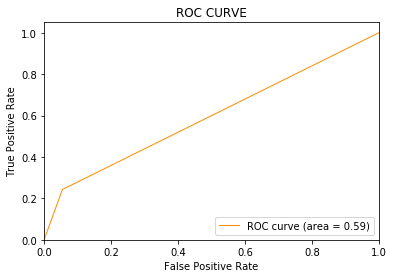

In [330]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

roc_auc = auc(fpr, tpr)


plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()


## RANDOM FOREST MODEL

### Random Forest

In [331]:
Ran_For= RandomForestClassifier(n_estimators=1000,max_depth=30, random_state=100,max_leaf_nodes=1000)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [332]:
y_pred2 = Ran_For.predict(X_test)
print('Accuracy score= {:.2f}'.format(Ran_For.score(X_test, y_test)*100))

Accuracy score= 86.11


### Precision, Recall, F1

In [333]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred2)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       146
           1       0.80      0.76      0.78        70

    accuracy                           0.86       216
   macro avg       0.84      0.83      0.84       216
weighted avg       0.86      0.86      0.86       216





### ROC CURVE

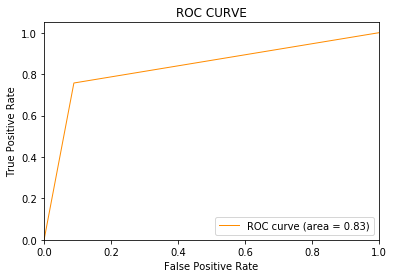

In [334]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

roc_auc = auc(fpr, tpr)


plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()


## COMPARISION OF SVM AND RANDOM FOREST MODELS

### Comparison of Results

In [335]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Deatiled Performance of the all models")
x.field_names = ["Model", "Accuracy"]

x.add_row(["SVM", 0.74])
x.add_row(["RandomForestClassifier",0.84])
print(x)
print('\n')



Deatiled Performance of the all models
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|          SVM           |   0.74   |
| RandomForestClassifier |   0.84   |
+------------------------+----------+




In [336]:
x = PrettyTable()
print('\n')
print("Best Model.")
x.field_names = ["Model", "Accuracy"]
x.add_row(["RandomForestClassifier",0.84])
print(x)
print('\n')



Best Model.
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
| RandomForestClassifier |   0.84   |
+------------------------+----------+




### Best Accuracy of Random Forest Algorithm is 84%

# RECURSSIVE FEATURE SELECTION

## IMPORTING DEPENDENCIES

In [0]:
import pandas as pd
from sklearn.metrics import accuracy_score as AS
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score as RAS
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

## RANDOM FOREST MODEL

### DATA PRE-PROCESSING

In [0]:
X_train, X_test, y_train, y_test = TTS(labels_X, class_y, test_size=0.10, shuffle=True, random_state=2000)

### EXTRACTING BEST FEATURES FROM DATASET

In [0]:
rfe=RFE(estimator=RFC(n_estimators=1000,max_depth=30, random_state=100,max_leaf_nodes=1000),step=2)

rfe=rfe.fit(X_train,y_train)

In [340]:
sel_features=pd.DataFrame({"Feature Name":list(X_train.columns),"Rank of feature":rfe.ranking_})
sel_features

,Feature Name,Rank of feature
0,SMA,7
1,EMA,7
2,MACD_Signal,4
3,MACD_Hist,1
4,MACD,6
5,RSI,6
6,ADX,1
7,CCI,1
8,Aroon Up,9
9,Aroon Down,9


In [341]:
rank1Features=list(sel_features[sel_features["Rank of feature"]==1]["Feature Name"])
rank1Features

['MACD_Hist',
 'ADX',
 'CCI',
 'Real Middle Band',
 'Chaikin A/D',
 'OBV',
 'MOM',
 'WILLR',
 'Change_oil',
 'Change_DAX',
 'Change_gold',
 'Change_Nikkei',
 'Change_SP',
 'Change_Shanghai',
 'Change_USD_EUR']

### RANDOM FOREST MODEL TESTING AGAINST BEST FEATURES SELECTED

In [0]:
X=labels_X[rank1Features]
X_train, X_test, y_train, y_test = TTS(X,class_y, test_size=0.10, shuffle=True, random_state=2000)

In [0]:
Model=RFC(n_estimators=1000,max_depth=30, random_state=100,max_leaf_nodes=1000)

Model.fit(X_train,y_train)
prediction=Model.predict(X_test)

In [344]:
print("ACCURACY is : {:.2f}".format(AS(y_test,prediction)*100))

ACCURACY is : 86.11


### Precision, Recall, F1

In [345]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, prediction)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       146
           1       0.80      0.76      0.78        70

    accuracy                           0.86       216
   macro avg       0.84      0.83      0.84       216
weighted avg       0.86      0.86      0.86       216





### ROC CURVE

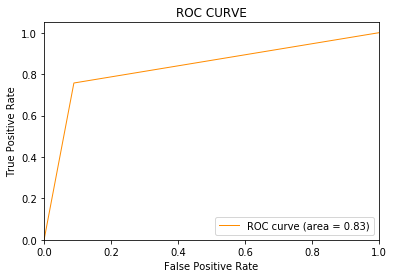

In [346]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)

roc_auc = auc(fpr, tpr)


plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()


## SVM MODEL

### DATA PRE-PROCESSING

In [0]:
X_train, X_test, y_train, y_test = TTS(labels_X,class_y, test_size=0.10, shuffle=True, random_state=2000)

### EXTRACTING BEST FEATURES FROM DATASET

In [0]:
rfe=RFE(estimator=SVC(kernel="linear",gamma="auto",random_state=5),step=5)

rfe=rfe.fit(X_train,y_train)

In [349]:
sel_features=pd.DataFrame({"Feature Name":list(X_train.columns),"Rank of feature":rfe.ranking_})
sel_features

,Feature Name,Rank of feature
0,SMA,1
1,EMA,1
2,MACD_Signal,1
3,MACD_Hist,1
4,MACD,1
5,RSI,4
6,ADX,2
7,CCI,3
8,Aroon Up,1
9,Aroon Down,4


In [350]:
rank1Features=list(sel_features[sel_features["Rank of feature"]<10]["Feature Name"])
rank1Features

['SMA',
 'EMA',
 'MACD_Signal',
 'MACD_Hist',
 'MACD',
 'RSI',
 'ADX',
 'CCI',
 'Aroon Up',
 'Aroon Down',
 'Real Middle Band',
 'Real Upper Band',
 'Real Lower Band',
 'Chaikin A/D',
 'OBV',
 'WMA',
 'MOM',
 'WILLR',
 'SlowD',
 'SlowK',
 '4. close',
 'Change_oil',
 'Change_DAX',
 'Change_gold',
 'Change_Nikkei',
 'Change_SP',
 'Change_Shanghai',
 'Change_USD_EUR',
 'Change_USD_GBP',
 'Change_USD_JPY']

### SVM MODEL TESTING AGAINST BEST FEATURES SELECTED

In [0]:
X=labels_X[rank1Features]
X_train, X_test, y_train, y_test = TTS(X, class_y, test_size=0.10, shuffle=True, random_state=2000)

In [0]:
Model=SVC(gamma="auto",random_state=5)

Model.fit(X_train,y_train)
prediction=Model.predict(X_test)

In [353]:
print("ACCURACY is : {:.2f}".format(AS(y_test,prediction)*100))

ACCURACY is : 71.76


### Precision, Recall, F1

In [354]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, prediction)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.72      0.95      0.82       146
           1       0.68      0.24      0.36        70

    accuracy                           0.72       216
   macro avg       0.70      0.59      0.59       216
weighted avg       0.71      0.72      0.67       216





### ROC CURVE

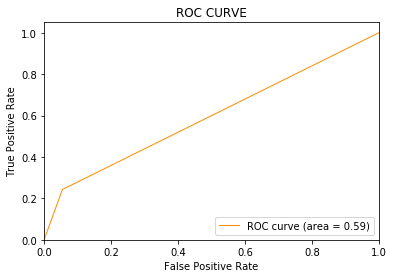

In [355]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)

roc_auc = auc(fpr, tpr)


plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()


## COMPARISION OF SVM AND RANDOM FOREST MODELS

### Comparison of Results

In [356]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Deatiled Performance of the all models")
x.field_names = ["Model", "Accuracy"]

x.add_row(["SVM", 74.24])
x.add_row(["RandomForestClassifier",85.59])
print(x)
print('\n')



Deatiled Performance of the all models
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|          SVM           |  74.24   |
| RandomForestClassifier |  85.59   |
+------------------------+----------+




In [357]:
x = PrettyTable()
print('\n')
print("Best Model.")
x.field_names = ["Model", "Accuracy"]
x.add_row(["RandomForestClassifier",85.59])
print(x)
print('\n')



Best Model.
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
| RandomForestClassifier |  85.59   |
+------------------------+----------+




## Accuracy of Random Forest Algorithm after FEATURE SELECTION is 85.59%

# TRAINING OF ALL DATA

### Now training all data (training&testing) on Random Forest Algorithm

In [0]:
# class_y=X.y
# labels_X=X.drop(columns=['y','date'])

### Random Forest

In [359]:
Ran_For= RandomForestClassifier(n_estimators=1000,max_depth=30, random_state=100,max_leaf_nodes=1000)
Ran_For= Ran_For.fit(labels_X , class_y)
Ran_For

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

### By Entring the Labels of target 1

In [0]:
data_for_prediction=pd.read_csv('prediction.csv')

In [362]:
data_for_prediction

,-1.611458897,-1.609445666,-0.673372637,0.667405683,-0.397989086,-0.185283271,-1.60896729,0.79352331,0.260193853,-2.065534681,-1.622879837,-1.595754235,-1.611458897.1,-1.66506568,-1.472565442,-1.61498361,-0.375885058,0.906304818,0.480194699,0.126934802,-1.575272426,1.4,-0.89,0.76,1.24,0.02,-1.37,0.82,0.17,-0.02
0,-1.611459,-1.609446,-0.673373,0.667406,-0.397989,-0.185283,-1.608967,0.793523,0.260194,-2.065535,-1.62288,-1.595754,-1.611459,-1.665066,-1.472565,-1.614984,-0.375885,0.906305,0.480195,0.126935,-1.575272,1.4,-0.89,0.76,1.24,0.02,-1.37,0.82,0.17,-0.02


### Prediction by using trained model

In [363]:
aa=Ran_For.predict(data_for_prediction)
if aa==1:
    print("stock prediction is 1")
else:
    print("stock prediction is 0")

stock prediction is 1
